In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score
%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df = pd.read_csv('movie.csv', encoding='ISO-8859-1')

df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
df.shape

(15509, 10)

In [6]:
df.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [7]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [8]:
#Eliminate missing  values
df.dropna(inplace=True)
#recheck for missing values
df.isna().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [9]:
df.shape

(5659, 10)

In [10]:
df['Duration'] = df['Duration'].str.strip('min')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   float64
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), object(8)
memory usage: 486.3+ KB


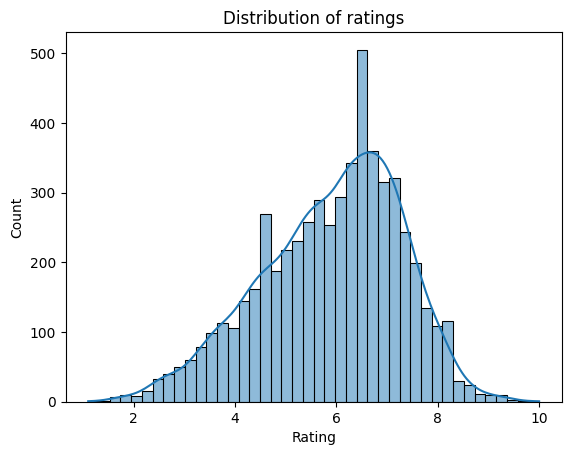

In [12]:
#Visulaze ratings
sns.histplot(data=df,x='Rating',kde=True)
plt.title('Distribution of ratings')
plt.show()

In [13]:
#visualize the years
sns.histplot(data=df,x='Year',kde=True)
plt.title('Distribution of years')
plt.show(

SyntaxError: incomplete input (<ipython-input-13-b08a4c1ec8b2>, line 4)

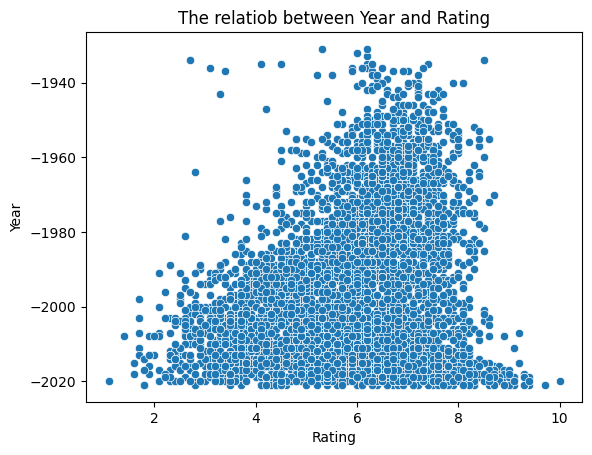

In [14]:
sns.scatterplot(data=df,x='Rating',y='Year')
plt.title("The relatiob between Year and Rating")
plt.show()

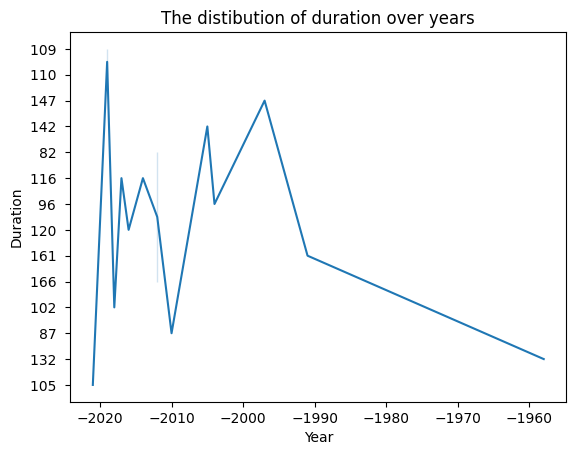

In [15]:
sns.lineplot(data=df.head(15),x='Year',y='Duration')
plt.title('The distibution of duration over years')
plt.show()

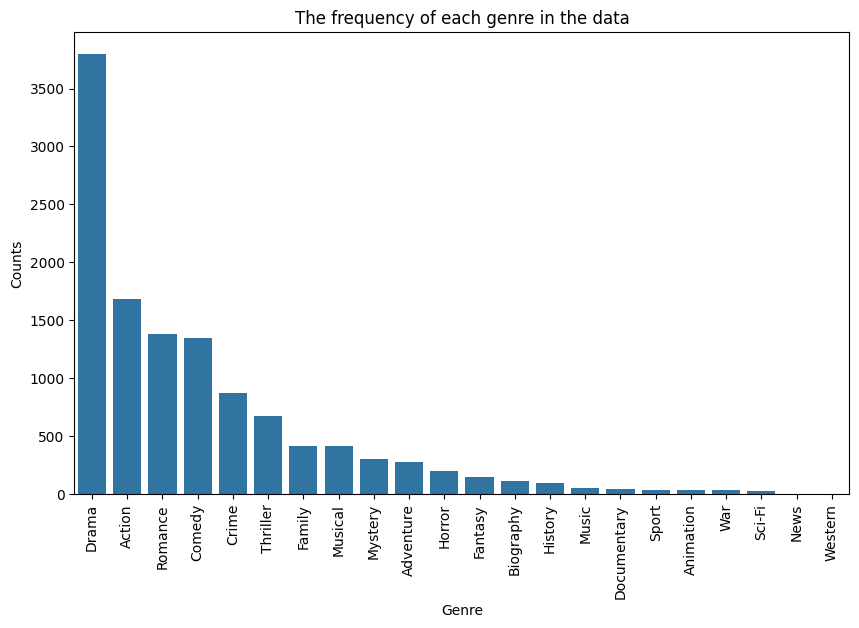

In [16]:
#visualze genre, before tat let's get all      the genres
movies_genre = df['Genre'].str.split(', ',expand=True).stack().value_counts()
labels = movies_genre.keys()
count = movies_genre.values
plt.figure(figsize=(10,6))
sns.barplot(x=labels,y=count)
plt.xticks(rotation=90)
plt.title('The frequency of each genre in the data')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.show()

In [17]:
df2 = df.drop('Name',axis=1)

In [18]:
df2.describe()

,Year,Rating
count,5659.000000,5659.000000
mean,-1996.247570,5.898533
std,19.741839,1.381165
min,-2021.000000,1.100000
25%,-2013.000000,5.000000
50%,-2002.000000,6.100000
75%,-1983.000000,6.900000
max,-1931.000000,10.000000
